# How to load an audio file

In [1]:
import librosa

signal, sample_rate = librosa.load("Data/genres_original/blues/blues.00000.wav")

In [2]:
signal #from this data we have to extract features like from individual assignemnt 3

array([ 0.00732422,  0.01660156,  0.00762939, ..., -0.05560303,
       -0.06106567, -0.06417847], dtype=float32)

In [3]:
sample_rate  #another figure that will help represent data

22050

# How to load an image file

In [4]:
import cv2 as cv

img = cv.imread("Data/images_original/blues/blues00000.png")

img = cv.resize(img, (64, 64))

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# print(gray.flatten())


In [5]:
def deleteFiles(folder_path):
    print(f"Deleting old files in {folder_path}")
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))


# Randomly makes training and testing data

In [6]:
import os
import random
import shutil

dataPath = 'Data'

trainSplit = 0.70


path = os.path.join(dataPath, 'genres_original')

genres = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]

for genre in genres:
    path = os.path.join(dataPath, 'genres_original', genre)
    files = os.listdir(path)
    
    random.shuffle(files)
    
    num_train_samples = int(len(files) * trainSplit)
    train_samples = files[:num_train_samples]
    test_samples = files[num_train_samples:]
#     print(len(train_samples))
#     print(len(test_samples))

    train_path = os.path.join(dataPath, "training_data", genre)
    test_path = os.path.join(dataPath, "testing_data", genre)
    os.makedirs(train_path, exist_ok=True)
    os.makedirs(test_path, exist_ok=True)

    if len(os.listdir(train_path)) > 0:
        deleteFiles(train_path)
    for sample in train_samples:
        src_path = os.path.join(path, sample)
        dst_path = os.path.join(train_path, sample)
        shutil.copy(src_path, dst_path)
        
    if len(os.listdir(train_path)) > 0:
        deleteFiles(test_path)    
    for sample in test_samples:
        src_path = os.path.join(path, sample)
        dst_path = os.path.join(test_path, sample)
        shutil.copy(src_path, dst_path)

Deleting old files in Data\training_data\blues
Deleting old files in Data\testing_data\blues
Deleting old files in Data\training_data\classical
Deleting old files in Data\testing_data\classical
Deleting old files in Data\training_data\country
Deleting old files in Data\testing_data\country
Deleting old files in Data\training_data\disco
Deleting old files in Data\testing_data\disco
Deleting old files in Data\training_data\hiphop
Deleting old files in Data\testing_data\hiphop
Deleting old files in Data\training_data\jazz
Deleting old files in Data\testing_data\jazz
Deleting old files in Data\training_data\metal
Deleting old files in Data\testing_data\metal
Deleting old files in Data\training_data\pop
Deleting old files in Data\testing_data\pop
Deleting old files in Data\training_data\reggae
Deleting old files in Data\testing_data\reggae
Deleting old files in Data\training_data\rock
Deleting old files in Data\testing_data\rock


## Dataset comes with features, uses these

In [7]:
import csv

X_train = []
Y_train = []
X_test = []
Y_test = []

with open('Data/features_30_sec.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='"')
    next(reader)

    
    i = 0
    for row in reader:
        imgPath = "Data/images_original/" + row[0].split('.')[0] + "/" + row[0].split('.')[0] + row[0].split('.')[1] + ".png"
#         print(imgPath)
        img = cv.imread(imgPath)
        
        img = cv.resize(img, (128, 128))

        gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#         for val in gray.flatten():
#             row.insert(-1, val)

        if(i % 100 < 100 * trainSplit):
            Y_train.append(row[0].split('.')[0])    
            X_train.append(row[1:-1])
        else:
            Y_test.append(row[0].split('.')[0])    
            X_test.append(row[1:-1])
        
        i+=1
        
X_train = [[float(item) if isinstance(item, str) else item for item in items] for items in X_train]
X_test = [[float(item) if isinstance(item, str) else item for item in items] for items in X_test]



print(len(Y_train))
print(len(X_train))
print(len(Y_test))
print(len(X_test))
print((X_train[:1]))

Data/images_original/blues/blues00000.png
Data/images_original/blues/blues00001.png
Data/images_original/blues/blues00002.png
Data/images_original/blues/blues00003.png
Data/images_original/blues/blues00004.png
Data/images_original/blues/blues00005.png
Data/images_original/blues/blues00006.png
Data/images_original/blues/blues00007.png
Data/images_original/blues/blues00008.png
Data/images_original/blues/blues00009.png
Data/images_original/blues/blues00010.png
Data/images_original/blues/blues00011.png
Data/images_original/blues/blues00012.png
Data/images_original/blues/blues00013.png
Data/images_original/blues/blues00014.png
Data/images_original/blues/blues00015.png
Data/images_original/blues/blues00016.png
Data/images_original/blues/blues00017.png
Data/images_original/blues/blues00018.png
Data/images_original/blues/blues00019.png
Data/images_original/blues/blues00020.png
Data/images_original/blues/blues00021.png
Data/images_original/blues/blues00022.png
Data/images_original/blues/blues00

Data/images_original/classical/classical00083.png
Data/images_original/classical/classical00084.png
Data/images_original/classical/classical00085.png
Data/images_original/classical/classical00086.png
Data/images_original/classical/classical00087.png
Data/images_original/classical/classical00088.png
Data/images_original/classical/classical00089.png
Data/images_original/classical/classical00090.png
Data/images_original/classical/classical00091.png
Data/images_original/classical/classical00092.png
Data/images_original/classical/classical00093.png
Data/images_original/classical/classical00094.png
Data/images_original/classical/classical00095.png
Data/images_original/classical/classical00096.png
Data/images_original/classical/classical00097.png
Data/images_original/classical/classical00098.png
Data/images_original/classical/classical00099.png
Data/images_original/country/country00000.png
Data/images_original/country/country00001.png
Data/images_original/country/country00002.png
Data/images_

Data/images_original/disco/disco00074.png
Data/images_original/disco/disco00075.png
Data/images_original/disco/disco00076.png
Data/images_original/disco/disco00077.png
Data/images_original/disco/disco00078.png
Data/images_original/disco/disco00079.png
Data/images_original/disco/disco00080.png
Data/images_original/disco/disco00081.png
Data/images_original/disco/disco00082.png
Data/images_original/disco/disco00083.png
Data/images_original/disco/disco00084.png
Data/images_original/disco/disco00085.png
Data/images_original/disco/disco00086.png
Data/images_original/disco/disco00087.png
Data/images_original/disco/disco00088.png
Data/images_original/disco/disco00089.png
Data/images_original/disco/disco00090.png
Data/images_original/disco/disco00091.png
Data/images_original/disco/disco00092.png
Data/images_original/disco/disco00093.png
Data/images_original/disco/disco00094.png
Data/images_original/disco/disco00095.png
Data/images_original/disco/disco00096.png
Data/images_original/disco/disco00

Data/images_original/jazz/jazz00084.png
Data/images_original/jazz/jazz00085.png
Data/images_original/jazz/jazz00086.png
Data/images_original/jazz/jazz00087.png
Data/images_original/jazz/jazz00088.png
Data/images_original/jazz/jazz00089.png
Data/images_original/jazz/jazz00090.png
Data/images_original/jazz/jazz00091.png
Data/images_original/jazz/jazz00092.png
Data/images_original/jazz/jazz00093.png
Data/images_original/jazz/jazz00094.png
Data/images_original/jazz/jazz00095.png
Data/images_original/jazz/jazz00096.png
Data/images_original/jazz/jazz00097.png
Data/images_original/jazz/jazz00098.png
Data/images_original/jazz/jazz00099.png
Data/images_original/metal/metal00000.png
Data/images_original/metal/metal00001.png
Data/images_original/metal/metal00002.png
Data/images_original/metal/metal00003.png
Data/images_original/metal/metal00004.png
Data/images_original/metal/metal00005.png
Data/images_original/metal/metal00006.png
Data/images_original/metal/metal00007.png
Data/images_original/met

Data/images_original/pop/pop00090.png
Data/images_original/pop/pop00091.png
Data/images_original/pop/pop00092.png
Data/images_original/pop/pop00093.png
Data/images_original/pop/pop00094.png
Data/images_original/pop/pop00095.png
Data/images_original/pop/pop00096.png
Data/images_original/pop/pop00097.png
Data/images_original/pop/pop00098.png
Data/images_original/pop/pop00099.png
Data/images_original/reggae/reggae00000.png
Data/images_original/reggae/reggae00001.png
Data/images_original/reggae/reggae00002.png
Data/images_original/reggae/reggae00003.png
Data/images_original/reggae/reggae00004.png
Data/images_original/reggae/reggae00005.png
Data/images_original/reggae/reggae00006.png
Data/images_original/reggae/reggae00007.png
Data/images_original/reggae/reggae00008.png
Data/images_original/reggae/reggae00009.png
Data/images_original/reggae/reggae00010.png
Data/images_original/reggae/reggae00011.png
Data/images_original/reggae/reggae00012.png
Data/images_original/reggae/reggae00013.png
Data

Data/images_original/rock/rock00088.png
Data/images_original/rock/rock00089.png
Data/images_original/rock/rock00090.png
Data/images_original/rock/rock00091.png
Data/images_original/rock/rock00092.png
Data/images_original/rock/rock00093.png
Data/images_original/rock/rock00094.png
Data/images_original/rock/rock00095.png
Data/images_original/rock/rock00096.png
Data/images_original/rock/rock00097.png
Data/images_original/rock/rock00098.png
Data/images_original/rock/rock00099.png
700
700
300
300
[[661794.0, 0.35008811950683594, 0.08875656872987747, 0.1302279233932495, 0.0028266964945942163, 1784.165849538755, 129774.06452515082, 2002.4490601176963, 85882.76131549841, 3805.8396058403423, 901505.4255328419, 0.08304482066898686, 0.0007669456545940504, -4.5297241740627214e-05, 0.00817228201776743, 7.783231922076084e-06, 0.00569818215444684, 123.046875, -113.57064819335938, 2564.20751953125, 121.57179260253906, 295.913818359375, -19.168142318725586, 235.57443237304688, 42.36642074584961, 151.106

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
import os
import random
import shutil
import librosa
# import librosa.display #this is the dumbest import ever that breaks everything
#https://github.com/matplotlib/matplotlib/issues/25506
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report



              precision    recall  f1-score   support

       blues       0.39      0.37      0.38        30
   classical       1.00      0.93      0.97        30
     country       0.48      0.50      0.49        30
       disco       0.44      0.50      0.47        30
      hiphop       0.45      0.30      0.36        30
        jazz       0.68      0.43      0.53        30
       metal       0.47      0.90      0.61        30
         pop       0.86      0.83      0.85        30
      reggae       0.43      0.33      0.38        30
        rock       0.27      0.27      0.27        30

    accuracy                           0.54       300
   macro avg       0.55      0.54      0.53       300
weighted avg       0.55      0.54      0.53       300

              precision    recall  f1-score   support

       blues       0.21      0.43      0.28        30
   classical       0.93      0.87      0.90        30
     country       0.06      0.03      0.04        30
       disco       0.24 

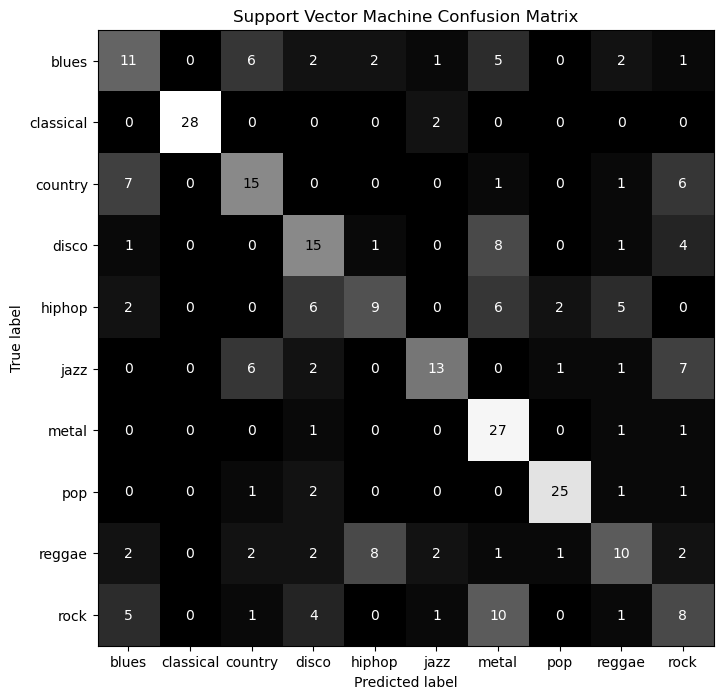

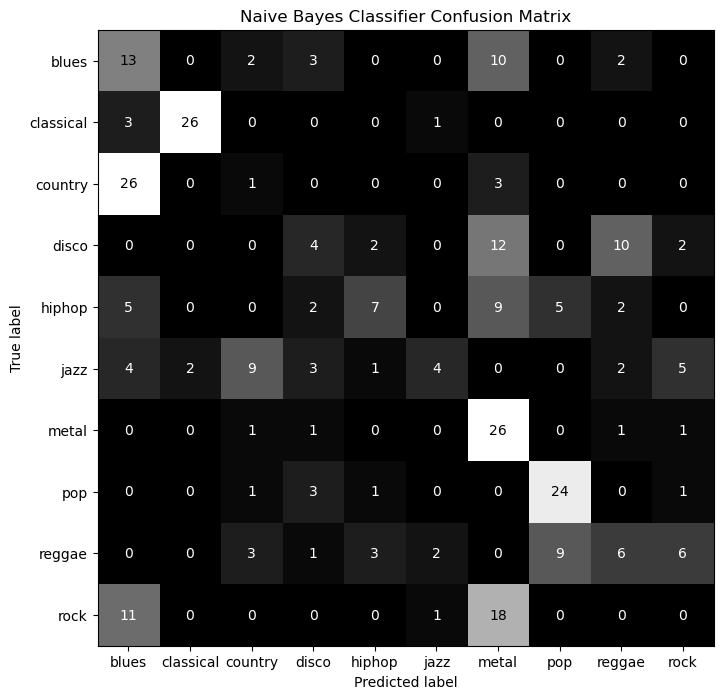

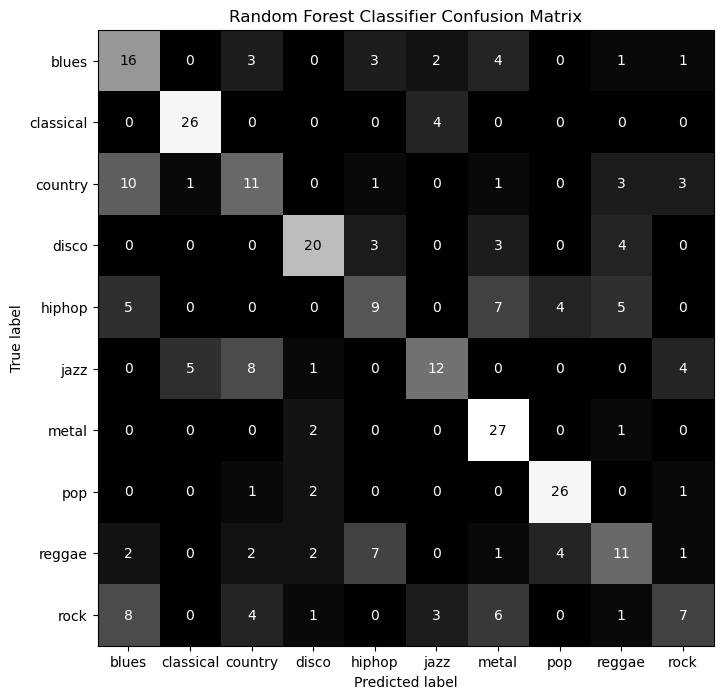

In [10]:
svc = SVC(probability=True)
nbc = GaussianNB()
rfc = RandomForestClassifier()

# print(type(X_train[0][0]))

svc.fit(X_train, Y_train)
nbc.fit(X_train, Y_train)
rfc.fit(X_train, Y_train)

y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_nbc_predicted = nbc.predict(X_test)
y_nbc_pred_proba = nbc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

print(classification_report(Y_test, y_svc_predicted))
print(classification_report(Y_test, y_nbc_predicted))
print(classification_report(Y_test, y_rfc_predicted))

models = ['Support Vector Machine', 'Naive Bayes Classifier', 'Random Forest Classifier']
predictions = [ y_svc_predicted, y_nbc_predicted, y_rfc_predicted]
pred_probabilities = [y_svc_pred_proba, y_nbc_pred_proba, y_rfc_pred_proba]
#setting up info needed to display the graphs
plot = 1


for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    # zipping the arrays to be able to access the nth element of each at the same time
    disp = ConfusionMatrixDisplay(confusion_matrix(np.array(Y_test).ravel(), prediction), display_labels=genres)
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.figure_.set_size_inches(10,8)
    disp.ax_.set_title(f"{model} Confusion Matrix")
    #actually displaying the models and setting up their axis info
